In [75]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## CONTENTS 
-  SoftMax Regression ("multiclass")
-  Polynomial Features 

x train and y train shape : (80, 2) (80,)


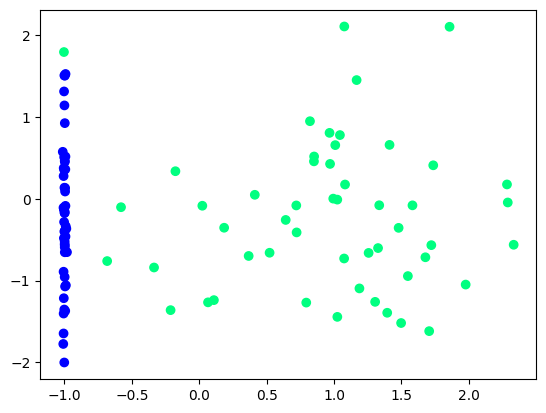

In [76]:
x,y  = make_classification(n_classes=2,n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,n_samples=100)
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter")
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)
print("x train and y train shape :",x_train.shape,y_train.shape)

#### SOFTMAX REGRESSION

In [77]:
model =  LogisticRegression(penalty=None,solver="saga",multi_class="multinomial")
model.fit(x_train,y_train)
pred =  model.predict(x_test)
accuracy_score(y_test,pred)

1.0

####  Polynomial Features in Logistic Regression

In [78]:
# poly =  PolynomialFeatures(degree=20)
# x_train_1 =  poly.fit_transform(x_train)
# x_test_1 = poly.transform(x_test)
# model.fit(x_train_1,y_train)
# model.score(x_test_1,y_test)

In [79]:
def generate_dummy():
    v1 = np.linspace(-3, 3, 10) # cuz our data is from -3 to 3  , but u can take anything 
    v2 = np.linspace(-2, 2, 10)
    x1, x2 = np.meshgrid(v1, v2)
    grid = np.c_[x1.ravel(), x2.ravel()]
    return (x1,x2,grid)

def plot_degree(degree=2):
    poly =  PolynomialFeatures(degree=degree)
    x_train_1 =  poly.fit_transform(x_train)
    x_test_1 = poly.transform(x_test)
    model.fit(x_train_1,y_train)
    score = model.score(x_test_1,y_test)
    
    (x1,x2,grid) =  generate_dummy()
    pred =  model.predict(poly.transform(grid))
    
    plt.title("Degree : {}  Accuracy  : {}".format(degree,score))
    plt.contourf(x1,x2,pred.reshape(x1.shape),alpha=0.5)
    plt.scatter(x_train[:,0],x_train[:,1],cmap="winter",c=y_train)
    plt.plot()

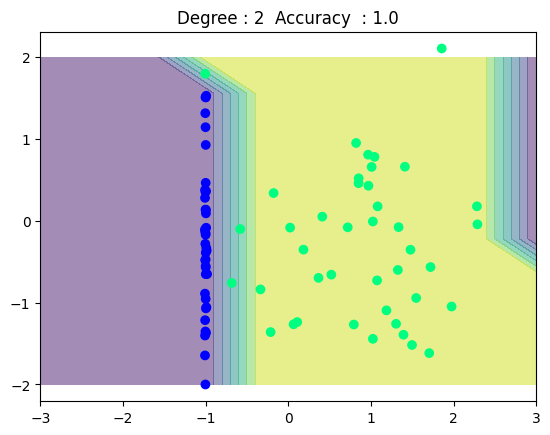

In [80]:
plot_degree(2)